In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib nbagg

In [4]:
from scipy import signal

In [5]:
import sys

In [6]:
fs = 1e3 #Hz; Sampling frequency
nyq = 0.5*fs #Hz; Nyquist frequency

In [7]:
#Parameters of Question
t = np.arange(-15, 15, 1/fs) #s; Time domain of signal

a1 = 22 #11Hz; main signal frequency
a2 = 14 #7Hz; Pink noise frequency
a3 = 147 #73.5Hz; Blue noise frequency

A1 = 1 #V; Amplitude of main signal
A2 = 0.7 #V; Amplitude of pink noise
A3 = 0.5 #V; Amplitude of blue noise

In [8]:
x1 = A1*np.cos(a1*np.pi*t) #Main signal
x = x1 + A2*np.sin(a2*np.pi*t) + A3*np.sin(a3*np.pi*t) #Noisy input we need to filter

<IPython.core.display.Javascript object>


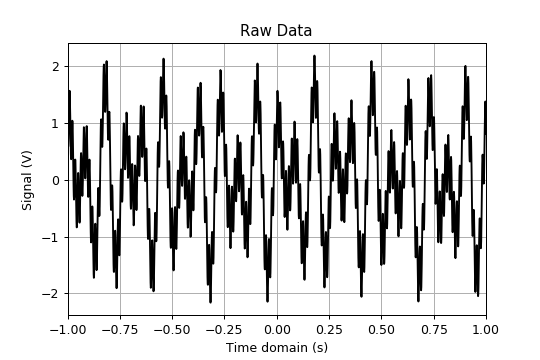

Text(0, 0.5, 'Signal (V)')

In [9]:
plt.close()
plt.plot(t, x, 'k-')
plt.title("Raw Data")
plt.xlim(-1, 1)
plt.grid(True)
plt.xlabel("Time domain (s)")
plt.ylabel("Signal (V)")

In [10]:
plt.close()

<IPython.core.display.Javascript object>


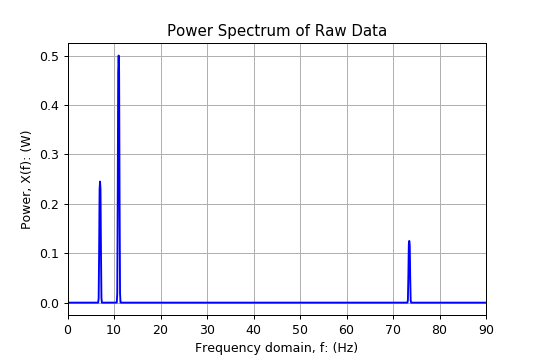

Text(0, 0.5, 'Power, X(f): (W)')

In [47]:
plt.close()
f, PSD_x = signal.welch(x, fs, 'flattop', 10*fs, scaling='spectrum') #SciPy's Welch PSD converter
#x refers to input signal
#since you know your detector - you know fs (sampling frequency)
#Here, 10*fs refers to number of frequency points you want it to compute
plt.plot(f, PSD_x, 'b-')
plt.title("Power Spectrum of Raw Data")
plt.grid(True)
plt.xlim(0, 90)
plt.xlabel("Frequency domain, f: (Hz)")
plt.ylabel("Power, X(f): (W)")

In [48]:
plt.close()

Now desigining 4th Order Butterworth Bandpass filter (from 9-50 Hz) and applying it 5 times to the signal, to filter it fully. 
Note that higher order filter seemed to be unstable, for given frequency range. So I found it more convenieent to just apply the filter multiple times.

First: Filter response:

In [13]:
order=4

In [14]:
#Designing lowpass digital filter such that frequencies above 50Hz, and below 9Hz (normalized by Nyquist freq.) are cut-off
b, a = signal.butter(order, [9/nyq, 50/nyq], btype='band') #SciPy's Butteriwrth filter.
#Outputs numerator and denominator coefficients, b, a resp., that are required for the above filter

#Using b, a and number of H points to be calculated (we need this equal to number of PSD points, for multiplication), 
#returns w and H(w)
w, h = signal.freqz(b, a, worN=len(f))

<IPython.core.display.Javascript object>


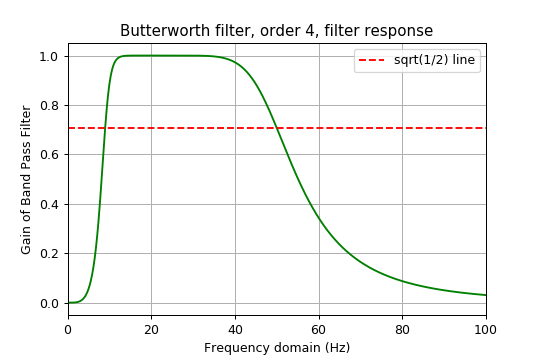

The red line intersecting with the filter response indicates that the Gain is sqrt(1/2) at the cut-off frequencies


In [16]:
plt.close()
plt.plot(w*nyq/np.pi, abs(h), 'g-')
plt.plot([0, 100], [1/np.sqrt(2), 1/np.sqrt(2)], 'r--', label="sqrt(1/2) line")
plt.title("Butterworth filter, order " + str(order) + ", filter response")
plt.grid(True)
plt.xlim(0, 100)
plt.xlabel("Frequency domain (Hz)")
plt.ylabel("Gain of Band Pass Filter")
plt.legend()
print("The red line intersecting with the filter response indicates that the Gain is sqrt(1/2) at the cut-off frequencies")

In [17]:
plt.close()

Now: filter application.
I found it easier to simply multiply the filtr with the PSD, rather than to use a built in software for it. So that is what I did.

In [18]:
PSD_y_trial = PSD_x*abs(h) #Filter applied once
PSD_y = PSD_x*abs(h)*abs(h)*abs(h)*abs(h)*abs(h) #Filter applied 5 times

<IPython.core.display.Javascript object>


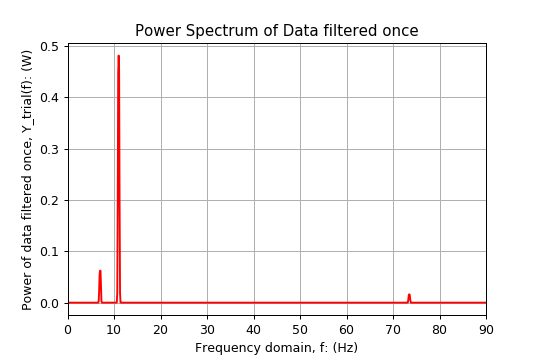

Text(0, 0.5, 'Power of data filtered once, Y_trial(f): (W)')

In [31]:
plt.close()
plt.plot(f, PSD_y_trial, 'r-')
plt.title("Power Spectrum of Data filtered once")
plt.grid(True)
plt.xlim(0, 90)
plt.xlabel("Frequency domain, f: (Hz)")
plt.ylabel("Power of data filtered once, Y_trial(f): (W)")

<IPython.core.display.Javascript object>


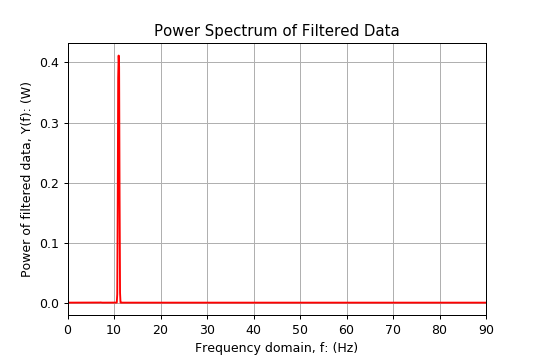

Text(0, 0.5, 'Power of filtered data, Y(f): (W)')

In [32]:
plt.close()
plt.plot(f, PSD_y, 'r-')
plt.title("Power Spectrum of Filtered Data")
plt.grid(True)
plt.xlim(0, 90)
plt.xlabel("Frequency domain, f: (Hz)")
plt.ylabel("Power of filtered data, Y(f): (W)")

In [33]:
plt.close()

<IPython.core.display.Javascript object>


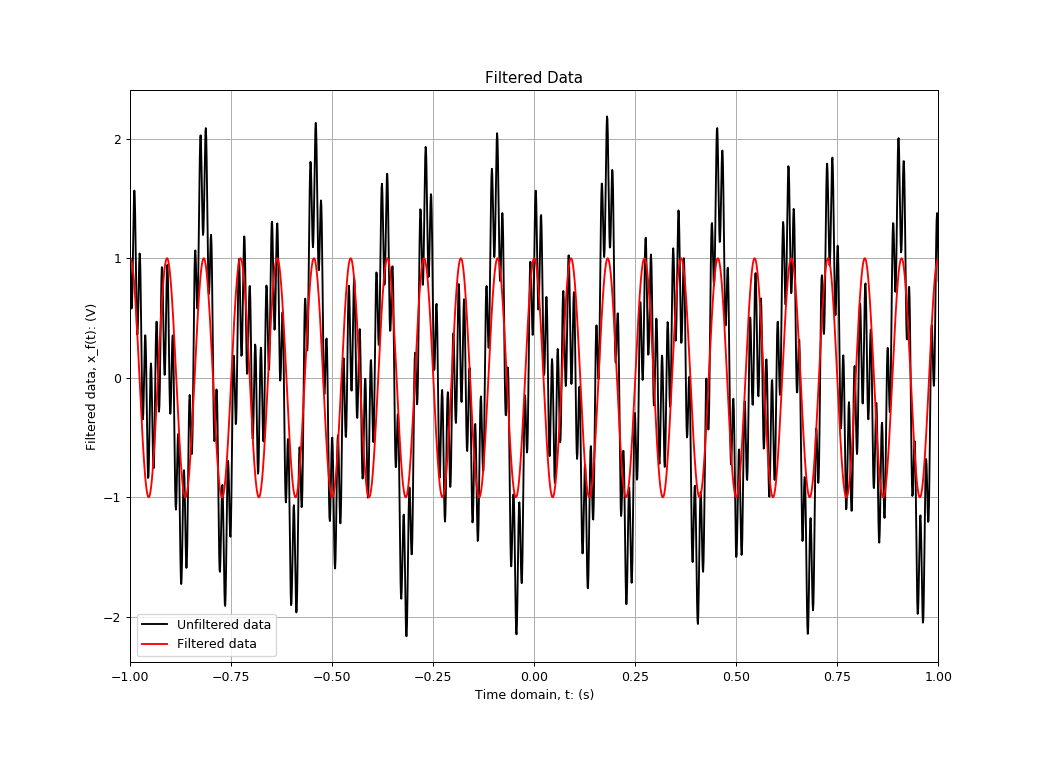

In [57]:
plt.close()

f_found = f[list(PSD_y).index(max(PSD_y))]
plt.plot(t, x, 'k-', label="Unfiltered data")
plt.plot(t, np.cos(f_found*2*np.pi*t), 'r-', label="Filtered data")
plt.title("Filtered Data")
plt.grid(True)
plt.xlim(-1, 1)
plt.xlabel("Time domain, t: (s)")
plt.ylabel("Filtered data, x_f(t): (V)")
plt.legend()

In [58]:
plt.close()

<IPython.core.display.Javascript object>


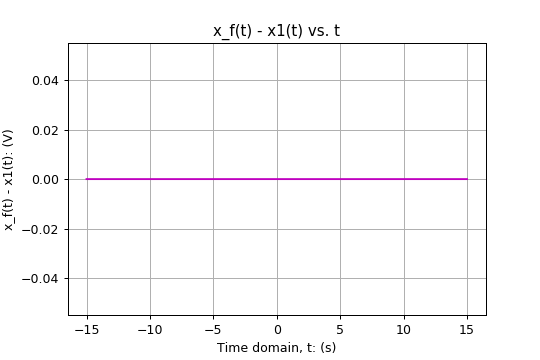

Text(0, 0.5, 'x_f(t) - x1(t): (V)')

In [59]:
plt.close()

plt.plot(t, np.cos(f_found*2*np.pi*t) - x1, 'm-')
plt.title("x_f(t) - x1(t) vs. t")
plt.grid(True)
plt.xlabel("Time domain, t: (s)")
plt.ylabel("x_f(t) - x1(t): (V)")

In [60]:
plt.close()